# Orthonormal Bases for Vector Spaces

### Taylor Simons

### Simple Overview

Orthonormal bases are special types of bases that are mathematically convenient. Bases, in general, help us transform vectors of data into more useful terms. Using an orthonormal basis instead of an non-orthonormal basis can simplify calculations. To understand orthonormal bases, let's first look at vector space bases in general.

#### Vector Space Bases

A vector space basis is a set of vectors that act as "build blocks" to describe every vector in the space. These basis vectors can be combined to represent every possible vector in the entire vector space. Similarly, every vector in the space can be broken down into a unique combination of these basis vectors. In more technical terms, the basis vectors span the vector space and are linearly independent.

Any vector in the vector space can be described in terms of a basis for that space. Since every vector can be formed as a linear combination of the basis vectors, vectors can be represented as a tuple of the coefficients of in the linear combination. For example, let $B = \{\vec{b}_1,\vec{b}_2,\dots,\vec{b}_n,\}$
be a basis for $\mathbb{R}^n$. Then $ v = c_1\vec{b}_1 + c_2\vec{b}_1 + \dots + c_n\vec{b}_n$. This combination of coefficients is unique for every vector $v$. Thus every vector in $\mathbb{R}^n$ can be described uniquely using the coefficients for that basis. 

The coefficients can be formed into a vector, making a coordinate vector: $[v]_B \begin{bmatrix}c_1\\c_2\\\vdots\\c_n\end{bmatrix}$. These coordinate vectors can be used in place of the original vectors, making analysis and computations more convenient. However, relationship between the original vectors do not always remain the same between the coordinate vectors. To ensure that these relationship are preserved, we can use special types of bases, orthonormal bases.

#### Orthonormal Bases

As the name suggests, orthonormal bases are defined as basis with vectors that are both __normalized__ and __orthogonal__ to each other. For a vector to be considered normalized, it must have a norm of one. Vectors in an inner product space are orthogonal to each other if their inner product is zero. In other words, if the basis $B = \{\vec{b}_1,\vec{b}_2,\dots,\vec{b}_n,\}$ then $\|\vec{b}_i\| = 1 $ for each $i$ (normalized) and $\langle \vec{b}_i,\vec{b}_j \rangle = 0$ for every $i$ and $j$ where $i\neq j$ (orthogonal).

Due to these properties, coordinate vectors of orthonormal basis preserve the metric and properties of the original vectors. This means that metrics like angle and distance are the same between coordinate vectors as they are in the original vectors. This way we can use the convenience of a new basis coordinate system without sacrificing meaningful metrics.

### Formal Definition

Let $V$ be an inner product space. Let $B$ be the set vectors $\{\vec{v}_1,\vec{v}_2,\dots,\vec{v}_n\}$. $B$ is an _orthonormal basis_ of $V$ if 
- $B \subset V,$
- $\text{span}(B) =V$
- $ B \text{ is }\text{lin. indep.}$
- $ \langle \vec{v}_i,\vec{v}_j \rangle = 0 \mkern20mu \forall i,j \text{ if } i \neq j$
- $ \|\vec{v}_i\| = 1 \mkern20mu \forall i$

### Metric Preservation

First, let us look at an example that demonstrates how coordinate vectors of orthonormal bases preserve distance and angle measure. Let us take two random vectors in $\mathbb{R}^2$.

In [1]:
import numpy as np
import numpy.linalg as la
dim = 2
v_1 = np.random.rand(dim,1) * np.random.randint(-10,10)
v_2 = np.random.rand(dim,1) * np.random.randint(-10,10)

print('v_1:')
print(v_1)
print('v_2:')
print(v_2)

v_1:
[[0.]
 [0.]]
v_2:
[[0.]
 [0.]]


Now let us plot these two vectors:

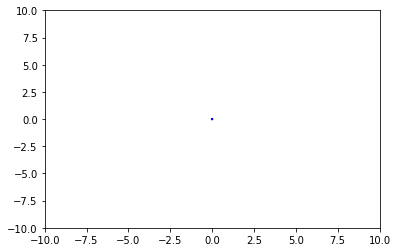

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_vectors(vecs,colors=None):
    x,y = zip(*vecs)
    plt.ylim([-10,10])
    plt.xlim([-10,10])
    x=np.array(x)
    y=np.array(y)
    orig_x,orig_y = x*0,y*0
    plt.quiver(orig_x,orig_y,x,y,color=colors, angles='xy', scale_units='xy', scale=1)
    plt.show()
    
display_vectors([v_1,v_2],['b','b'])

Using Numpy we can produce an orthonormal basis.

b_1: [-0.13549454  0.99077809]
b_2: [0.99077809 0.13549454]


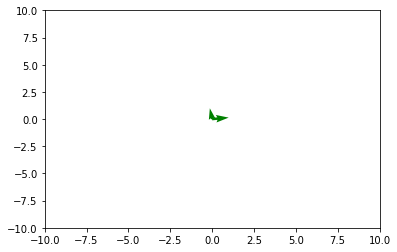

In [3]:
from scipy.stats import ortho_group
B = ortho_group.rvs(2)
b_1 = B[:,0]
b_2 = B[:,1]
print('b_1:',b_1)
print('b_2:',b_2)
display_vectors([b_1,b_2],['g','g'])

Another convenient property of an orthonormal basis is that the change of basis computation is rather simple. Since $B\vec{c} = \vec{v}$ where $B$ is the basis matrix, $\vec{c}$ is the coordinate vector and $\vec{v}$ is the original vector, we can multiply both side by $B^{-1}$ to solve for $\vec{c}$: $\vec{c} =B^{-1}\vec{v}$. If $B$ is orthonormal then, $B^{-1}=B^H$ and $\vec{c} =B^H\vec{v}$. This is demonstrated below. The blue vectors come from the standard basis for $\mathbb{R}^n$ and the red vectors are the coordinate vectors of the generated orthonormal basis.

vb_1:
[[0.]
 [0.]]
vb_2:
[[0.]
 [0.]]


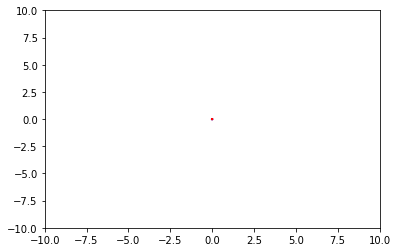

In [4]:
vb_1 = np.matmul(B.T,v_1)
vb_2 = np.matmul(B.T,v_2)
print('vb_1:')
print(vb_1)
print('vb_2:')
print(vb_2)
display_vectors([v_1,v_2,vb_1,vb_2],['b','b','r','r'])

We can see the angle and distance between the two vectors are preserved between the two pairs.

### Data Analysis

We can use a orthonormal basis representation to help better understand noise data. If collected data follows a linear trend, an orthonormal coordinate representation aligned with that trend gives us a convenient way to view the error.

Let's take a look at noisy data that follows a linear trend in $\mathbb{R}^2$.

[[-3.77064001 -4.40437111]
 [ 2.86633351  3.16505991]
 [ 1.40023586 -0.42610358]
 [ 1.55260185  2.4167596 ]
 [ 4.39737559  5.48091544]
 [-1.99989858 -1.50939927]
 [-6.58999055 -6.53415212]
 [-5.00409261 -3.75594483]
 [ 1.01811914 -1.89735322]
 [ 0.34298744  2.16772222]]


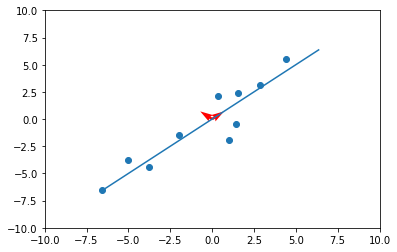

In [5]:
import random

theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
B = np.array(((c,-s), (s, c)))
n = 1000
x = lin = np.linspace(-9,9,n)
line = np.stack((x,x*0),axis=-1)
line = np.matmul(B,line.T).T
noise = np.random.normal(0, 1, line.shape)
data = line + np.random.normal(0, 1, line.shape)
data = data[np.random.choice(range(n),10,replace=True)]
print(data)
plt.scatter(data[:,0],data[:,1])
plt.plot(line[:,0],line[:,1])

end_p = 15
plt.ylim([-end_p,end_p])
plt.xlim([-end_p,end_p])
display_vectors([B[:,0],B[:,1]],['r','r'])
plt.show()

Each point lies close to the solid line with some noise. From this raw data, it is not trivial to calculate the error of each point. However, if we represent this data using an orthonormal basis that is aligned with the fitted line, finding the error for each point becomes trivial. In our case, the rotation matrix used to produce the data is the basis.

$$B = \begin{bmatrix}
cos(\theta) && sin(\theta)\\
-sin(\theta) && cos(\theta)
\end{bmatrix}$$

Below, all the data points are converted to their basis representations.

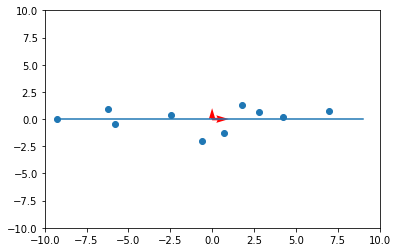

In [6]:
import math
rotated_data = np.matmul(B.T,data.T).T
new_line = np.matmul(B.T,line.T).T
plt.scatter(rotated_data[:,0],rotated_data[:,1])
plt.plot(new_line[:,0],new_line[:,1])

plt.ylim([-end_p,end_p])
plt.xlim([-end_p,end_p])
display_vectors([[1,0],[0,1]],['r','r'])
plt.show()

In this form, the noise for each point is just the value of the $y$ component printed below.

In [7]:
print(rotated_data)

[[-5.7806058  -0.44811556]
 [ 4.26483919  0.21123147]
 [ 0.68881554 -1.291417  ]
 [ 2.8067624   0.61105181]
 [ 6.98500657  0.76617838]
 [-2.48144831  0.34683539]
 [-9.28017028  0.03948374]
 [-6.19428188  0.88257376]
 [-0.62171238 -2.06155028]
 [ 1.77533982  1.29028234]]


### Challenge Problem - GPS PRN Codes
#### By Jacob Bartschi

#### Background

The GPS system is a system of satellite transmitters that transmit information to determine their location in space. Using knowledge of the satellites' positions and the time it takes for their signals to reach a receiver, the receiver can determine their own location. In order for GPS to use a small overall bandwidth, GPS signals are modulated by spread spectrum Psuerandom Noise (PRN) sequences. Each of the 32 GPS satellites use their own unique code of 1023 bits (for C/A codes). This allows each satellite to transmit at the same frequency without interfering with eachother. Navigation data used to determine satellite positions is modulated on top of the PRN sequences. Received GPS signals end up as a linear combination of each visible satellite's transmit signal.

C/A PRN codes are generated using two 10 bit shift registers. The first shift register (G1) takes feedback from its 3rd and 10th positions and modulo 2 adds (an xor operation) them together to create the new input before shifting to the right. The second shift register (G2) takes feedback from positions 2,3,6,8,9, and 10 and modulo 2 adds them together to create the new input before shifting to the right.

The code below shows how to create a shift register:

In [8]:
def shift(register, feedback, output):
    """GPS Shift Register
    
    :param list feedback: which positions to use as feedback (1 indexed)
    :param list output: which positions are output (1 indexed)
    :returns output of shift register:
    
    """
    
    # calculate output
    out = [register[i-1] for i in output]
    if len(out) > 1:
        out = sum(out) % 2
    else:
        out = out[0]
        
    # modulo 2 add feedback
    fb = sum([register[i-1] for i in feedback]) % 2
    
    # shift to the right
    for i in reversed(range(len(register[1:]))):
        register[i+1] = register[i]
        
    # put feedback in position 1
    register[0] = fb
    
    return out

To create the C/A PRN codes used by GPS, the output of the G1 register (the value getting shifted out of the register) is modulo 2 added to 2 of the values in the G2 register. For example, the PRN 1 Code taps positions 2 and 6 of the G2 register. Each code has predesignated G2 tap positions to create unique codes.

The code below provides a function that generates the 1023 PRN code for a given GPS satellite:

In [9]:
SV = {
   1: [2,6],
   2: [3,7],
   3: [4,8],
   4: [5,9],
   5: [1,9],
   6: [2,10],
   7: [1,8],
   8: [2,9],
   9: [3,10],
  10: [2,3],
  11: [3,4],
  12: [5,6],
  13: [6,7],
  14: [7,8],
  15: [8,9],
  16: [9,10],
  17: [1,4],
  18: [2,5],
  19: [3,6],
  20: [4,7],
  21: [5,8],
  22: [6,9],
  23: [1,3],
  24: [4,6],
  25: [5,7],
  26: [6,8],
  27: [7,9],
  28: [8,10],
  29: [1,6],
  30: [2,7],
  31: [3,8],
  32: [4,9],
}

def PRN(sv):
    """Build the CA code (PRN) for a given satellite ID
    
    :param int sv: satellite code (1-32)
    :returns list: ca code for chosen satellite
    
    """
    
    # init registers
    G1 = [1 for i in range(10)]
    G2 = [1 for i in range(10)]

    ca = [] # stuff output in here
    
    # create sequence
    for i in range(1023):
        g1 = shift(G1, [3,10], [10])
        g2 = shift(G2, [2,3,6,8,9,10], SV[sv]) # <- sat chosen here from table
        
        # modulo 2 add and append to the code
        ca.append((g1 + g2) % 2)

    # return C/A code!
    return ca

#### Problem
##### Part A
Show numerically that the 32 PRN codes form an orthogonal basis for recieved GPS signals.

The following code is an example of how to generate all 32 PRN codes using the code listed previously:

In [10]:
prn_codes = [PRN(1), PRN(2)]

for i in range(33):
    if i > 2:
        prn_codes.append(PRN(i))

Hint: The PRN codes are transmitted using a BPSK scheme, so a 1 in the code is +1V and a 0 is -1V.

##### Part B
The file gps_prn_hidden_code.mat (also provided as a .txt) contains signals modulated on top of four PRN codes (codes 1, 2, 3, and 4) and added together, as would be the case at the antenna of a GPS receiver. In this exercise, each code chip (1023 bits) represents one bit of transmitted data. Each signal contains 3 8-bit ascii symbols for a total of 24 bits of data and a total signal length of 1023 * 24 = 24552 bits. Seperate each of the four signals from the combined signal and parse the hidden word in each.

Hint 1: The signals are all aligned in time and start at the beginning of their code chips, ie there are no unnecessary bits or need to find the start/end of the signals.

Hint 2: The PRN codes are modulated where a data bit value of 1 is associated with the PRN code and a bit value of 0 is associated with the code * -1. For example if a PRN code was 1001, then a data bit of 1 is represented by 1001 and a data bit of 0 is represented by 0110.


<details>
<summary>Click here for Answers</summary>
    Hidden word in PRN 1: cat <br/>
    Hidden word in PRN 2: dog <br/>
    Hidden word in PRN 3: byu <br/>
    Hidden word in PRN 4: sky
</details>

A solution done in matlab is provided in gps_prn_hidden_code_solution.m